In [13]:
import numpy as np
import pandas as pd
import plotly 
import datetime as dt
import calendar
import yfinance as yf

In [14]:
usa_deaths_data = pd.read_csv("P1_df_usa_deaths_data.csv")
usa_disaster_data_year_month = pd.read_csv('P1_df_usa_disaster_data_year_month_data.csv')
usa_jumps_data = pd.read_csv('P1_df_usa_jumps_data.csv')
usa_jumps_year_month = pd.read_csv('P1_df_usa_jumps_year_month_data.csv')
usa_gdp_cap_data = pd.read_csv('P1_usa_gdp_cap_data.csv')
sector_jumps_data = pd.read_csv('sector_jumps.csv')
death_affected = pd.read_csv('P1_df_usa_deaths_affected.csv')

### YEAR AND TOTAL DEATHS

In [3]:
usa_deaths_data.head()

,year,total_deaths
0,2000,162.0
1,2001,153.0
2,2002,444.0
3,2003,231.0
4,2004,219.0


### YEAR - MONTH / DEATHS & AFFECTED 

In [15]:
usa_disaster_data_year_month.head()
#usa_disaster_data_year_month.set_index('year',inplace=True)

,year,start_month,total_deaths,no_affected
0,2000,1,5,0
1,2000,2,25,1731
2,2000,3,5,3000
3,2000,5,5,25840
4,2000,6,0,8800


In [5]:
#usa_disaster_data_year_month['total_deaths'].sum()
#usa_disaster_data_year_month.columns= ['year', 'month', 'total_deaths', 'no_affected']

7362

In [9]:
usa_disaster_data_year_month.head()

,month,total_deaths,no_affected
year,,,
2000,1,5,0
2000,2,25,1731
2000,3,5,3000
2000,5,5,25840
2000,6,0,8800


In [16]:
### USA JUMPS COUNT BY YEAR
usa_disaster_data_year_month.drop(columns=['year', 'month'], inplace=True)

usa_jumps_data
usa_jumps_data.set_index('year', inplace=True)

usa_disaster_data_year_month.set_index('Date', inplace=True)

usa_disaster_data_year_month.head()

usa_disaster_data_year_month = usa_disaster_data_year_month.rename(columns={'start_month':'month'})

In [17]:
for x, y in usa_disaster_data_year_month.iterrows():
    year=str(y[0])
    month=str(y[1])
    print(f'{year} and {month}')
    usa_disaster_data_year_month.loc[x,'Date']=pd.to_datetime(year+'-'+month)

2000 and 1
2000 and 2
2000 and 3
2000 and 5
2000 and 6
2000 and 7
2000 and 8
2000 and 9
2000 and 10
2000 and 11
2000 and 12
2001 and 2
2001 and 3
2001 and 4
2001 and 6
2001 and 7
2001 and 8
2001 and 9
2001 and 10
2001 and 11
2002 and 1
2002 and 2
2002 and 3
2002 and 4
2002 and 5
2002 and 6
2002 and 7
2002 and 9
2002 and 10
2002 and 11
2002 and 12
2003 and 2
2003 and 3
2003 and 4
2003 and 5
2003 and 6
2003 and 7
2003 and 8
2003 and 9
2003 and 10
2003 and 11
2003 and 12
2004 and 1
2004 and 3
2004 and 5
2004 and 6
2004 and 7
2004 and 8
2004 and 9
2004 and 10
2005 and 1
2005 and 2
2005 and 4
2005 and 5
2005 and 7
2005 and 8
2005 and 9
2005 and 10
2005 and 12
2006 and 3
2006 and 4
2006 and 5
2006 and 6
2006 and 7
2006 and 8
2006 and 9
2006 and 10
2006 and 11
2006 and 12
2007 and 1
2007 and 2
2007 and 3
2007 and 4
2007 and 5
2007 and 6
2007 and 8
2007 and 10
2007 and 11
2007 and 12
2008 and 1
2008 and 2
2008 and 3
2008 and 4
2008 and 5
2008 and 6
2008 and 7
2008 and 8
2008 and 9
2008 and 11


## SECTOR JUMPS & CONCAT DISASTERS/AFFECTED

In [34]:
sector_jumps_data.head()

,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109
2000-01-24,-0.0272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026399,-0.035445,-0.028682,-0.032634,-0.028801,-0.013453,-0.029844,-0.037318
2000-01-28,-0.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017016,-0.011574,-0.026479,-0.035714,-0.008152,-0.005294,-0.020243,-0.039466
2000-02-18,-0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030619,-0.029176,-0.021919,-0.033784,-0.011611,-0.036747,-0.027478,-0.014779


In [40]:
#sector_jumps_data.set_index('Date', inplace=True)
sector_jumps_data.index=pd.to_datetime(sector_jumps_data.index)
#sector_jumps.drop(columns=['Date'], inplace=True)

In [41]:
sector_jumps_data.head()

,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109
2000-01-24,-0.0272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026399,-0.035445,-0.028682,-0.032634,-0.028801,-0.013453,-0.029844,-0.037318
2000-01-28,-0.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017016,-0.011574,-0.026479,-0.035714,-0.008152,-0.005294,-0.020243,-0.039466
2000-02-18,-0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030619,-0.029176,-0.021919,-0.033784,-0.011611,-0.036747,-0.027478,-0.014779


In [42]:
sector_jumps2=sector_jumps_data.copy()

In [43]:
all_jumps_year=sector_jumps2.groupby(sector_jumps2.index.year).apply(lambda x: (abs(x)>.025).sum())

In [44]:
all_jumps_month=sector_jumps2.groupby([sector_jumps2.index.year, sector_jumps2.index.month]).apply(lambda x: (abs(x)>.025).sum())

In [45]:
year_jumps_and_disasters=pd.concat([all_jumps_year, usa_disaster_data_year_month.groupby(usa_disaster_data_year_month.index.year).sum()], axis=1, join='inner')

In [48]:
year_jumps_and_disasters.to_csv('yearly_jumps_disasters.csv')

## MONTHLY JUMPS

In [50]:
month_jumps = pd.read_csv('month_jumps.csv')

In [52]:
month_jumps.head()

,Date,Date.1,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction,total_deaths,no_affected
0,2000,1,4,0,0,0,0,0,0,0,1,1,4,3,3,1,1,4,5,0
1,2000,2,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,25,1731
2,2000,3,2,0,0,0,0,0,0,0,2,2,2,2,2,1,1,2,5,3000
3,2000,5,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,5,25840
4,2000,10,3,0,0,0,3,0,3,0,0,1,1,3,0,0,1,2,2,14418


In [53]:
month_jumps_and_disasters=pd.concat([all_jumps_month, usa_disaster_data_year_month.groupby([usa_disaster_data_year_month.index.year, usa_disaster_data_year_month.index.month]).sum()], axis=1,join='inner').sort_index()

In [54]:
month_jumps_and_disasters.head()

CRSP Market Cap  Communications  Materials  Consumer Discretionary  \
Date Date                                                                       
2000 1                   4               0          0                       0   
     2                   1               0          0                       0   
     3                   2               0          0                       0   
     5                   1               0          0                       0   
     10                  3               0          0                       0   

           Consumer Staples  Energy  Financials  Health Care  Industrial  \
Date Date                                                                  
2000 1                    0       0           0            0           1   
     2                    0       0           0            0           1   
     3                    0       0           0            0           2   
     5                    1       0           1            0           0   
     10                   3       0           3            0           0   

           Technology  Real Estate  Utilities  BioTech  Defense  \
Date Date                                                         
2000 1              1            4          3        3        1   
     2              1            0          1        0        1   
     3              2            2          2        2        1   
     5              0            0          1        0        0   
     10             1            1          3        0        0   

           Semiconductor  Home Construction  total_deaths  no_affected  
Date Date                                                               
2000 1                 1                  4             5            0  
     2                 1                  0            25         1731  
     3                 1                  2             5         3000  
     5                 1                  0             5        25840  
     10                1                  2             2        14418

In [55]:
import plotly.express as px
#df = px.data.gapminder()

In [61]:
fig = px.scatter(year_jumps_and_disasters, x=year_jumps_and_disasters.index, y='CRSP Market Cap',size='no_affected', color='no_affected',hover_name='total_deaths', log_x=False, size_max=200)

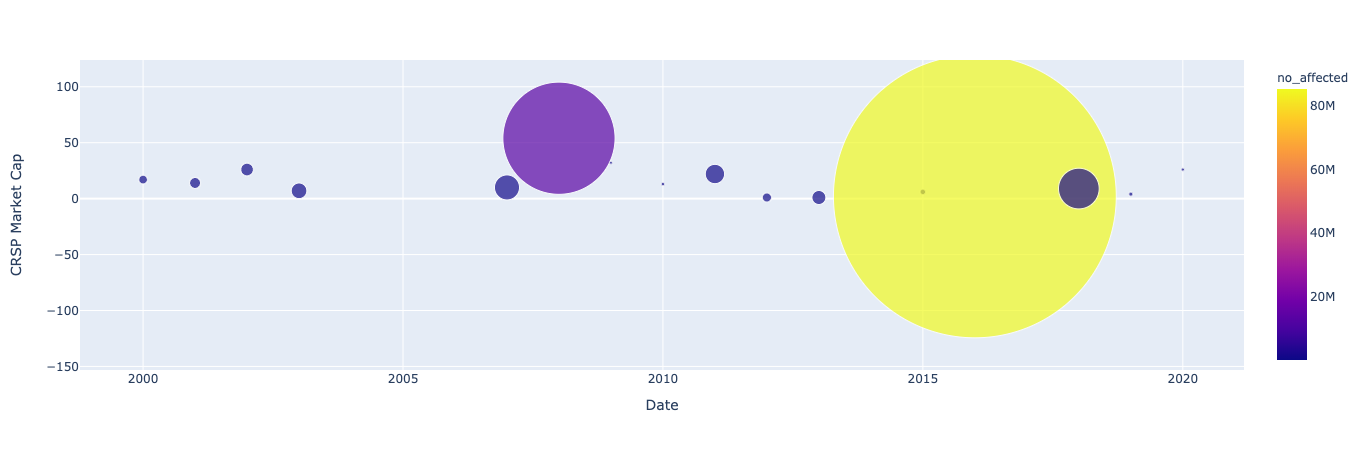

In [62]:
fig.show()

In [68]:
fig = px.scatter(year_jumps_and_disasters, x=year_jumps_and_disasters.index, y='CRSP Market Cap',size='no_affected', color='total_deaths' ,hover_name='total_deaths', log_x=False, size_max=200)

year_jumps_and_disasters.columns

#

Index(['CRSP Market Cap', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'total_deaths', 'no_affected'],
      dtype='object')

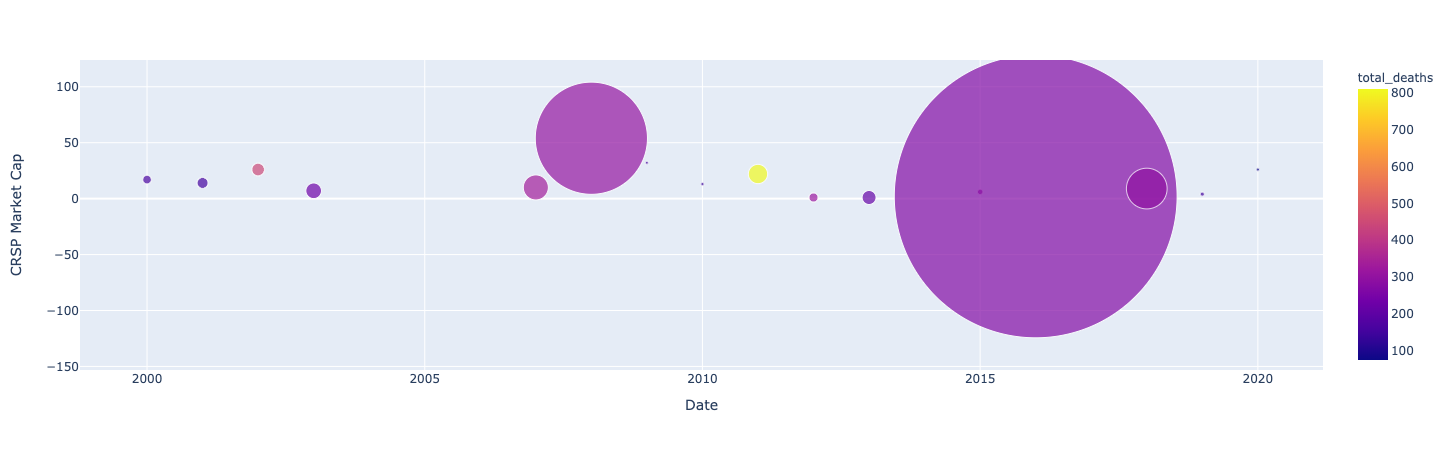

In [69]:
fig.show()

## JUMPS YEAR, MONTH - RETURN

In [7]:
usa_jumps_year_month.head()

,year,month,return
0,2000,1,4
1,2000,2,1
2,2000,3,2
3,2000,4,4
4,2000,5,1


### GDP BY YEAR - CAP AND GDP 

In [8]:
usa_gdp_cap_data.head(20)

,year,cap,gdp
0,2000,36334.90878,1.025230e+13
1,2001,37133.24281,1.058180e+13
2,2002,38023.16111,1.093640e+13
3,2003,39496.48588,1.145820e+13
4,2004,41712.80107,1.221370e+13
5,2005,44114.74778,1.303660e+13
6,2006,46298.73144,1.381460e+13
7,2007,47975.96768,1.445190e+13
8,2008,48382.55845,1.471280e+13
9,2009,47099.98047,1.444890e+13


In [9]:
sector_jumps_data.head()

,Date,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
0,2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
1,2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109
2,2000-01-24,-0.0272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026399,-0.035445,-0.028682,-0.032634,-0.028801,-0.013453,-0.029844,-0.037318
3,2000-01-28,-0.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017016,-0.011574,-0.026479,-0.035714,-0.008152,-0.005294,-0.020243,-0.039466
4,2000-02-18,-0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030619,-0.029176,-0.021919,-0.033784,-0.011611,-0.036747,-0.027478,-0.014779


In [10]:
#usa_jumps_year_month.set_index(['year','month'], inplace=True)
#usa_disaster_data_year_month.set_index(['year','month'], inplace=True)

In [11]:
usa_disaster_data_year_month.head()

,year,start_month,total_deaths,no_affected
0,2000,1,5,0
1,2000,2,25,1731
2,2000,3,5,3000
3,2000,5,5,25840
4,2000,6,0,8800


In [12]:
month_year_joined = pd.concat([usa_jumps_year_month, usa_disaster_data_year_month], axis='columns', join='inner')

In [13]:
month_year_joined.sort_index(inplace=True)

In [14]:
month_year_joined.to_csv("Month_year_jumps_deaths_affected.csv")

In [15]:
#sector_jumps_data.groupby(sector_jumps_data.index.year).count()
sector_jumps_data.index = pd.to_datetime(sector_jumps_data.index)

In [16]:
sector_jumps_data.groupby(sector_jumps_data.index.year).count()

,Date,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
1970,245,245,225,180,180,234,233,234,216,245,245,245,245,245,245,245,245


In [17]:
sector_jumps_data.loc[(sector_jumps_data['CRSP Market Cap'] > .025),'CRSP Market Cap'] 

1970-01-01 00:00:00.000000001    0.032200
1970-01-01 00:00:00.000000006    0.047300
1970-01-01 00:00:00.000000008    0.032600
1970-01-01 00:00:00.000000009    0.028600
1970-01-01 00:00:00.000000010    0.034200
1970-01-01 00:00:00.000000011    0.032400
1970-01-01 00:00:00.000000013    0.034500
1970-01-01 00:00:00.000000014    0.034900
1970-01-01 00:00:00.000000015    0.039600
1970-01-01 00:00:00.000000018    0.050600
1970-01-01 00:00:00.000000023    0.025500
1970-01-01 00:00:00.000000025    0.043900
1970-01-01 00:00:00.000000026    0.027400
1970-01-01 00:00:00.000000027    0.039400
1970-01-01 00:00:00.000000028    0.028800
1970-01-01 00:00:00.000000031    0.039000
1970-01-01 00:00:00.000000033    0.037800
1970-01-01 00:00:00.000000034    0.028700
1970-01-01 00:00:00.000000035    0.036600
1970-01-01 00:00:00.000000041    0.057500
1970-01-01 00:00:00.000000042    0.054300
1970-01-01 00:00:00.000000045    0.030000
1970-01-01 00:00:00.000000046    0.032900
1970-01-01 00:00:00.000000047    0

In [18]:
sector_jumps_data = pd.read_csv('sector_jumps.csv')

In [19]:
sector_jumps_data.loc[(((sector_jumps_data['Communications'])*100).abs() <2.5), 'Communications']

22    -0.019077
30     0.002797
31     0.002899
32    -0.017722
38    -0.022612
39     0.002920
55     0.010753
56     0.020408
60    -0.011288
66    -0.008710
67    -0.012038
68     0.019544
69    -0.021235
70    -0.015241
71    -0.022424
72     0.007065
74    -0.021302
75    -0.001457
77    -0.012563
82    -0.017692
83     0.006097
84     0.017608
86    -0.012678
87    -0.018594
90     0.015105
93     0.014464
100   -0.006953
102   -0.024086
104   -0.020793
108   -0.000686
         ...   
134    0.021051
135   -0.004208
136    0.007439
138   -0.014345
139   -0.016138
140    0.015242
147   -0.012821
148    0.008006
149    0.018621
151    0.011765
152   -0.022578
153    0.011938
154    0.024282
155    0.007245
156   -0.021330
158    0.010794
160   -0.012382
170    0.017175
183   -0.020053
186   -0.017570
189    0.024232
190    0.020133
191   -0.020768
208   -0.022951
213   -0.013757
217   -0.022300
225   -0.017423
227    0.021000
235   -0.005508
238   -0.019477
Name: Communications, Le

In [20]:
#sector_jumps_data['Absolute_Col']= abs(sector_jumps_data['Communications'] < 2.5)

In [21]:
sector_jumps_data.loc[(((sector_jumps_data['Industrial'])*100).abs() <2.5),'Industrial'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Technology'])*100).abs() <2.5),'Technology'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Communications'])*100).abs() <2.5),'Communications'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Real Estate'])*100).abs() <2.5),'Real Estate'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Financials'])*100).abs() <2.5),'Financials'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Health Care'])*100).abs() <2.5),'Health Care'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Materials'])*100).abs() <2.5),'Materials'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Consumer Discretionary'])*100).abs() <2.5),'Consumer Discretionary'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Consumer Staples'])*100).abs() <2.5),'Consumer Staples'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Energy'])*100).abs() <2.5),'Energy'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Utilities'])*100).abs() <2.5),'Utilities'] = 0
sector_jumps_data.loc[(((sector_jumps_data['BioTech'])*100).abs() <2.5),'BioTech'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Defense'])*100).abs() <2.5),'Defense'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Semiconductor'])*100).abs() <2.5),'Semiconductor'] = 0
sector_jumps_data.loc[(((sector_jumps_data['Home Construction'])*100).abs() <2.5),'Home Construction'] = 0

In [22]:
#sector_jumps_data.index = pd.to_datetime(sector_jumps_data.index)
#sector_jumps_data.reset_index(inplace=True)

In [23]:
sector_jumps_data.head()

,Date,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
0,2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.027627,-0.050733,-0.028159,-0.030165,0.000000,-0.030083
1,2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.038101,0.000000,0.063395,0.000000,0.000000,0.047109
2,2000-01-24,-0.0272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026399,-0.035445,-0.028682,-0.032634,-0.028801,0.000000,-0.029844,-0.037318
3,2000-01-28,-0.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.026479,-0.035714,0.000000,0.000000,0.000000,-0.039466
4,2000-02-18,-0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030619,-0.029176,0.000000,-0.033784,0.000000,-0.036747,-0.027478,0.000000


In [24]:
#sector_jumps_datasector_jumps2.set_index('Date', inplace=True)
#sector_jumps2.index=pd.to_datetime(sector_jumps2.index

### SECTOR JUMPS DATA

In [25]:
sector_jumps_data = pd.read_csv('sector_jumps.csv')

In [26]:
sector_jumps_data.head(2)

,Date,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
0,2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
1,2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109


#### SET COLUMNS 

In [27]:
sector_jumps_data.columns = ['year', 'CRSP Market Cap', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction']

In [28]:
sector_jumps_data.set_index('year', inplace=True)

In [29]:
sector_jumps_data.reset_index(inplace=True)

#### FOR LOOP THAT COUNTS NUMBER OF JUMPS OVER 2.5% 

In [30]:
for x, y in sector_jumps_data.iterrows():
    
    for index, elem in enumerate(y[1:]):
        #print(sector_jumps2.iloc[x, index+1])
        if abs(elem)>.025:
            sector_jumps_data.iloc[x, index+1]=1
        else:
            sector_jumps_data.iloc[x, index+1]=0

In [31]:
sector_jumps_data.head()

,year,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
0,2000-01-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,2000-01-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2000-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,2000-01-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,2000-02-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


#### SET INDEX TO YEAR 

In [32]:
sector_jumps_data.set_index('year', inplace=True)

In [71]:
sector_jumps_data.head()

,CRSP Market Cap,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-04,-0.0384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
2000-01-07,0.0322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109
2000-01-24,-0.0272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026399,-0.035445,-0.028682,-0.032634,-0.028801,-0.013453,-0.029844,-0.037318
2000-01-28,-0.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017016,-0.011574,-0.026479,-0.035714,-0.008152,-0.005294,-0.020243,-0.039466
2000-02-18,-0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030619,-0.029176,-0.021919,-0.033784,-0.011611,-0.036747,-0.027478,-0.014779


#### SUM THE TOTAL NUMBER OF JUMPS BY SECTOR

In [72]:
financials = sector_jumps_data["Financials"].sum()

In [73]:
tech = sector_jumps_data["Technology"].sum()

In [74]:
semi_conduct = sector_jumps_data["Semiconductor"].sum()

In [75]:
real_estate = sector_jumps_data["Real Estate"].sum()

In [76]:
health_care = sector_jumps_data["Health Care"].sum()

In [77]:
energy = sector_jumps_data["Energy"].sum()

In [78]:
utilities = sector_jumps_data["Utilities"].sum()

In [79]:
bio_tech = sector_jumps_data["BioTech"].sum()

In [80]:
industrials = sector_jumps_data["Industrial"].sum()

In [81]:
comm = sector_jumps_data["Communications"].sum()

In [82]:
defense = sector_jumps_data["Defense"].sum()

In [83]:
consu_dis = sector_jumps_data["Consumer Discretionary"].sum()

In [84]:
consu_stap = sector_jumps_data["Consumer Staples"].sum()

In [85]:
home_construct = sector_jumps_data["Home Construction"].sum()

In [86]:
market_cap = sector_jumps_data["CRSP Market Cap"].sum()

In [87]:
top10_sectors = [financials, tech, real_estate, health_care, utilities, industrials, comm, consu_dis, consu_stap, home_construct]

In [91]:
top10_sectors.sort()

[-1.5880333181451576,
 -1.0538427250252873,
 -0.8927389087172468,
 -0.8648493226636558,
 -0.7591725215675245,
 -0.6059540087938466,
 -0.591671983109018,
 -0.5613987862256186,
 0.04259533246157923,
 0.16330761204132593]